# MNIST Hand Written Digit Classification 
* You are given the MNIST dataset below, select two digits from the data, e.g. 0 and 5, and 
* use any two machine learning models to classify the two different images. Each method is 50 points.
* Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model.
* (Bonus 20 points) Use any one method to classify any three digits (e.g. 0 vs 1 vs 2)
* (Bonus 20 points) Can you write down a digit on a paper, take a picture, and let your model tell which digit is it?
* (Bayesian bonus) If you are able to give Bayesian intpretation of your model, a total of 20 bonus points.
* Mandatory part: 100 points, bonus parts: 40 points. Perfect score: 160 points. (your score)/(100) * 15 is the total
* credit to your final grade

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata

#Fetching the original dataset
mnist = fetch_mldata("MNIST original")

X = mnist.data / 255.0
y = mnist.target
print(X.shape) 
print(y.shape)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)
(70000,)


In [3]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [4]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

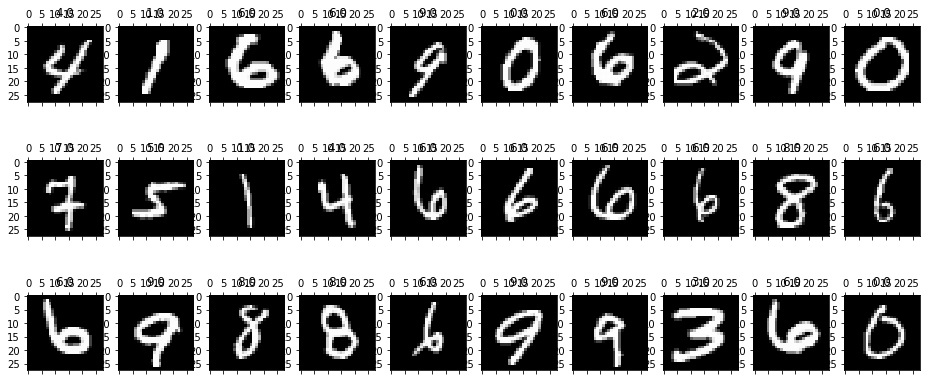

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

# Splitting Data into Training and Test Sets


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

In [7]:
print(X_train.shape)
print(X_test.shape)

(56000, 784)
(14000, 784)


# Displaying Images and Labels

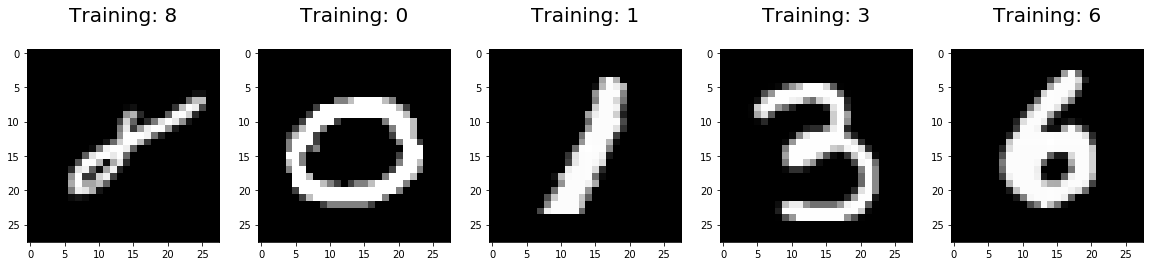

In [8]:
#Plotting the 1st 5 images of the training dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Step 1. Import RandomForestClassifier

In [9]:
#Fitting the random forest on Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
b=rfc.predict(X_test[0].reshape(1,-1))

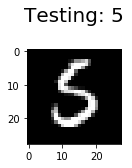

In [11]:
plt.figure(figsize=(20,4))
for index, (b, label) in enumerate(zip(X_test[0:1], y_test[0:1])):
    plt.subplot(1, 10, index + 1)
    #plt.subplot(1, 10, b)
    plt.imshow(np.reshape(b, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize = 20)

In [12]:
# Predict for Multiple Observations (images) at Once
a=rfc.predict(X_test[0:10])

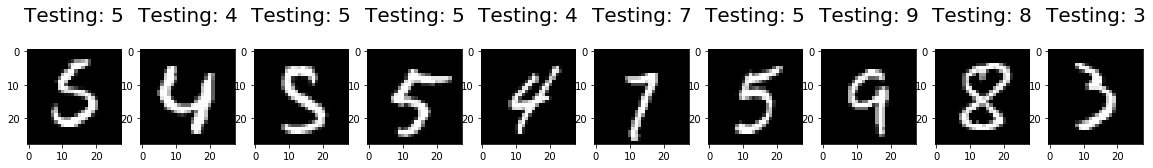

In [13]:
plt.figure(figsize=(20,4))
for index, (a, label) in enumerate(zip(X_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(a, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize = 20)

In [14]:
# Make predictions on entire test data
predictions = rfc.predict(X_test)

In [15]:
print(predictions)

[5. 4. 5. ... 2. 6. 7.]


In [16]:
score = rfc.score(X_test, y_test)
print(f'Test Acuuracy score is {score:.2f} ')

Test Acuuracy score is 0.95 
